Accuracy: 0.35

Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.20      0.17         5
           1       0.62      0.50      0.56        10
           2       0.20      0.20      0.20         5

    accuracy                           0.35        20
   macro avg       0.32      0.30      0.31        20
weighted avg       0.40      0.35      0.37        20



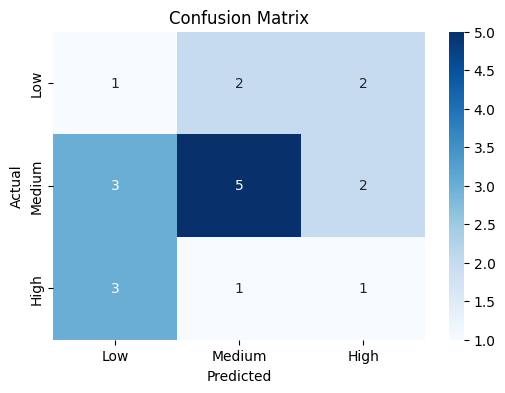

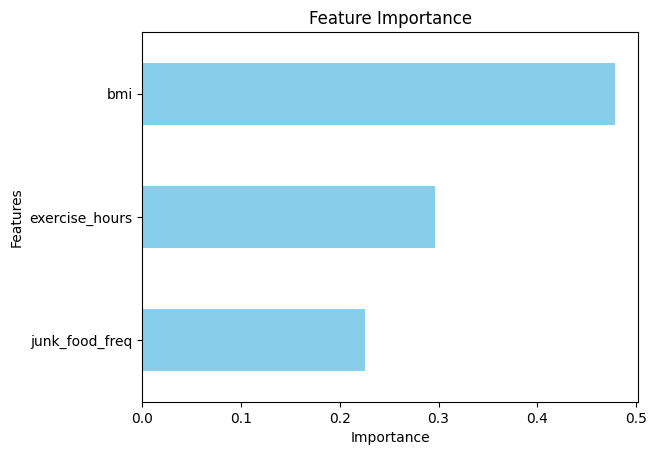

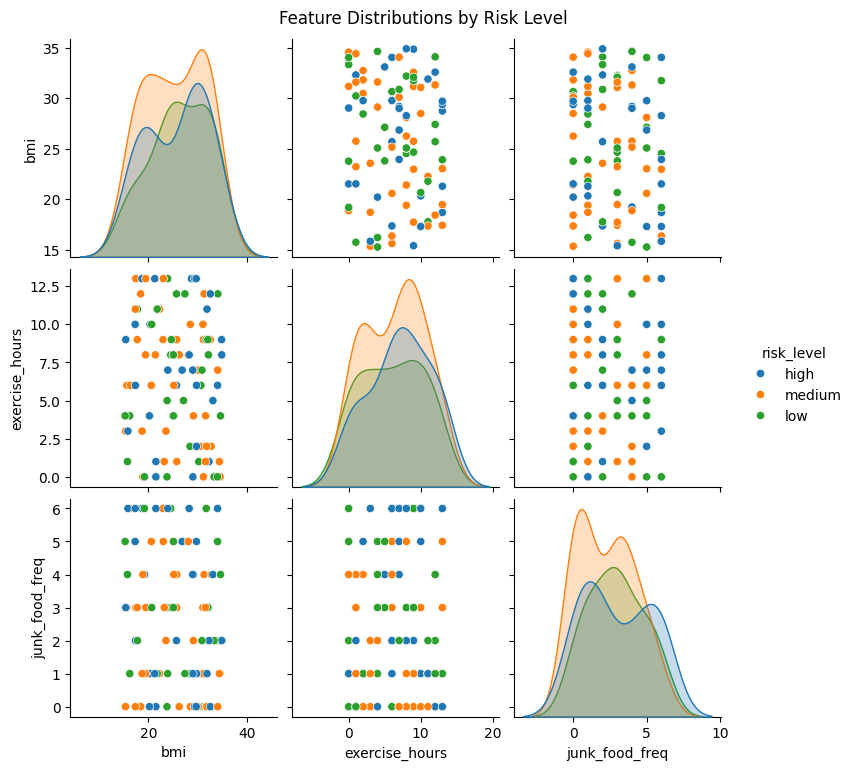

Predicted Risk Level: low


In [8]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 2: Load data
df = pd.read_csv("/content/health_risk.csv")

# Step 3: Encode target variable
df['risk_level'] = df['risk_level'].map({'low': 0, 'medium': 1, 'high': 2})
label_map = {0: 'low', 1: 'medium', 2: 'high'}

# Step 4: Features and target
X = df[['bmi', 'exercise_hours', 'junk_food_freq']]
y = df['risk_level']

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 9: Visualize Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Step 10: Optional - Pairplot for visualizing data distribution
df_copy = df.copy()
df_copy['risk_level'] = df_copy['risk_level'].map(label_map)
sns.pairplot(df_copy, hue='risk_level')
plt.suptitle("Feature Distributions by Risk Level", y=1.02)
plt.show()

# Step 11: Example prediction
sample = pd.DataFrame({
    'bmi': [27.5],
    'exercise_hours': [5],
    'junk_food_freq': [2]
})
prediction = model.predict(sample)[0]
print("Predicted Risk Level:", label_map[prediction])
